In [49]:
import os
from threading import Thread
import datetime as dt
from psaw import PushshiftAPI
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
api = PushshiftAPI()

my_subreddit = 'walstreetbet'
start=int(dt.datetime(2020,1,1).timestamp())
end=int(dt.datetime(2021,1,25).timestamp())

query = 'GME|Gamestop'

results = list(api.search_submissions(
                            after=start,
                            before=end,
                            q=query,
                            subreddit='wallstreetbets',
                            filter=['author', 'title', 'id', 'score', 'created_utc', 'num_comments']))

KeyboardInterrupt: 

In [50]:
df = pd.DataFrame(results).drop('d_', axis=1)

In [51]:
file_path = 'wallstreetbets.csv'
df.to_csv(file_path)

In [52]:
df = pd.read_csv('wallstreetbets.csv')

In [83]:
df['created_on'] = pd.to_datetime(df['created_utc'], unit='s')

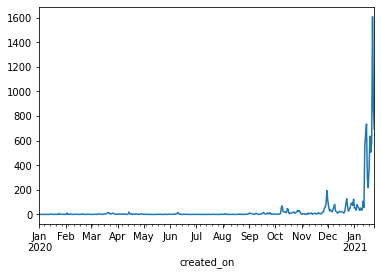

In [103]:
date_bins = df.resample('D', on='created_on').count()
date_bins['Unnamed: 0'].plot()
plt.show()

In [100]:
submission_total = len(df)
print(f'Submissions total: {submission_total}')
unique_authors = len(df['author'].unique())
print(f'Unique authors: {unique_authors}')

Submissions total: 11552
Unique authors: 7725


In [117]:
# Unique authors under each week
unique_authors = df.resample('W', on='created_on').nunique()

KeyError: 'authors'

# Search Comments

In [ ]:
comments = []

for id in df['id']:
    res = api.search_comments(
                                link_id=id, 
                                subreddit='wallstreetbets',
                                filter=['author', 'title', 'id', 'submission', 'score', 'created_utc', 'num_comments']
                            )
    res.drop('d_', axis=1, inplace=True)
    comments.append(res)

